In [1]:
import pandas as pd 
import numpy as np 

from tools_tolgay import functions_importing_observations as observations

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'cm'
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = (12, 6)
rcParams['figure.dpi'] = 100

import importlib

In [2]:
importlib.reload(observations)

# Read the MW data 
miville_deschenes_2017 = observations.miville_deschenes_2017(fdir = "/home/dtolgay/Observations")

# use only Rgal < 15 kpc
condition = miville_deschenes_2017['Rgal'] < 15
miville_deschenes_2017 = miville_deschenes_2017[condition]

# Saving original values
miville_deschenes_2017['original_hden'] = miville_deschenes_2017['hden'].copy()
miville_deschenes_2017['rudolph_metallicity'] = miville_deschenes_2017['metallicity']

# # Set metallicity to solar for all clouds
# miville_deschenes_2017['metallicity'] = 2.0

# Set the density of the clouds 
# miville_deschenes_2017['hden'] *= 20


# folder_name = "miville_deschenes_2017_metallicitySet2_hdenx20"
# base_fdir_to_write = f"/scratch/dtolgay/cloudy_runs/z_0/miville_deschenes_2017_runs/{folder_name}"
# base_fdir_to_write = f"/scratch/dtolgay/cloudy_runs/z_0/miville_deschenes_2017_runs/miville_deschenes_2017_hdenx20"


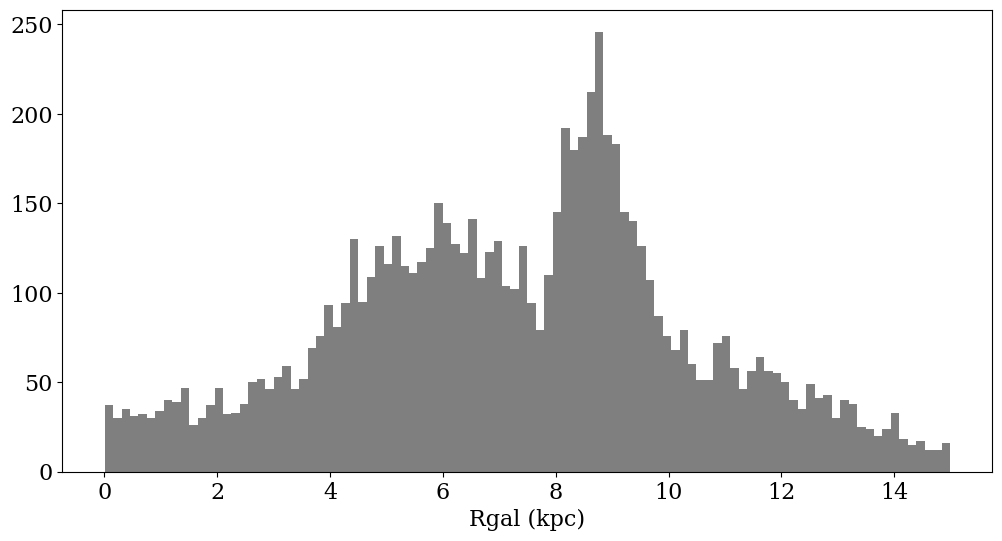

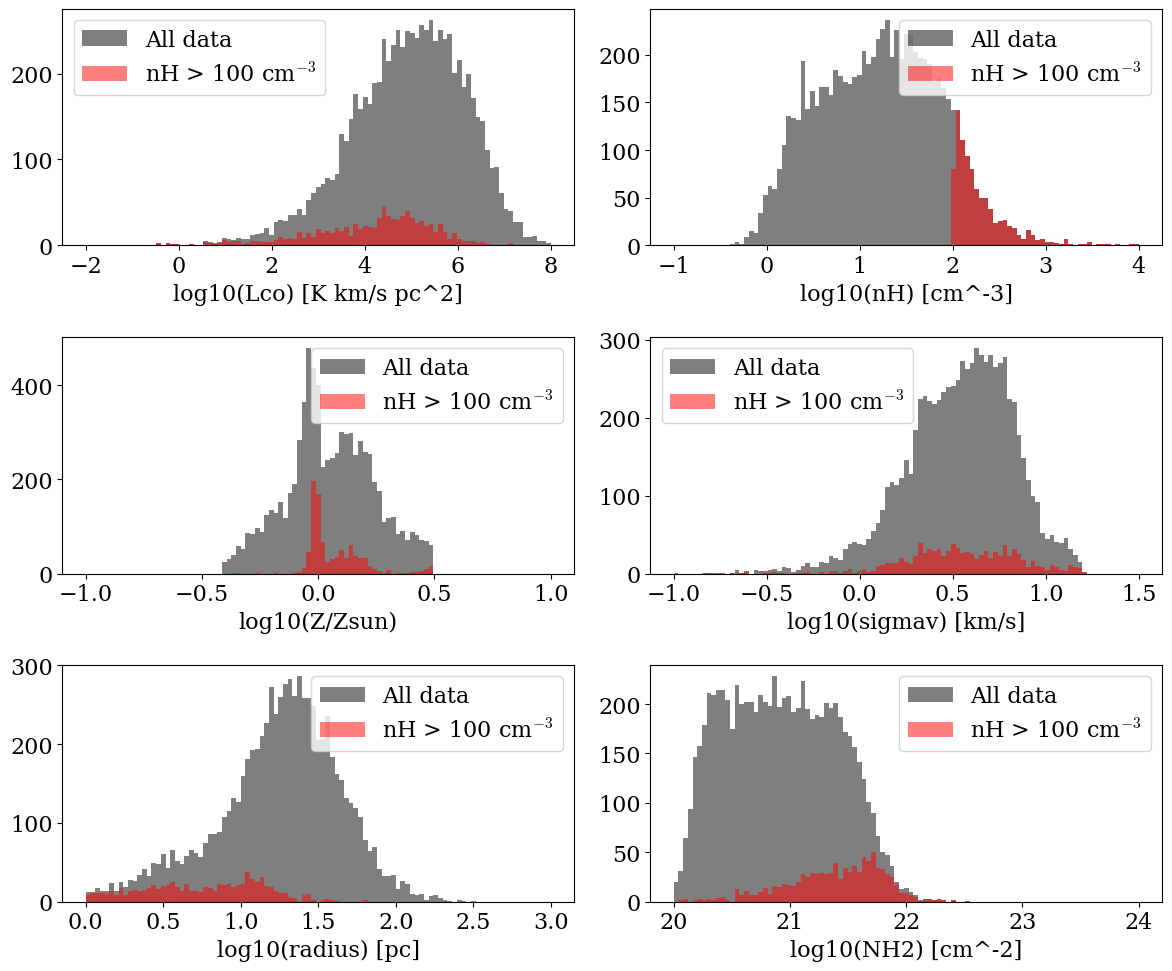

In [3]:
plt.hist(
    miville_deschenes_2017['Rgal'], bins = 100, alpha = 0.5, 
    label = "Miville-Deschênes et al. (2017)", 
    color = "black"
)

plt.xlabel("Rgal (kpc)")
plt.show()

fig, axs = plt.subplots(3, 2, figsize=(12, 10))
axs = axs.flatten()
# columns = ['Lco', 'hden', 'metallicity', 'turbulence', 'radius']

columns = {
    'Lco': {
        "column_name": "Lco",
        "bins": np.linspace(-2, 8, 100),
        "xlabel": "log10(Lco) [K km/s pc^2]",
    }, 
    'hden': {
        "column_name": "hden",
        "bins": np.linspace(-1, 4, 100),
        "xlabel": "log10(nH) [cm^-3]",
    },
    'metallicity': {
        "column_name": "metallicity",
        "bins": np.linspace(-1, 1, 100),
        "xlabel": "log10(Z/Zsun)",
    },
    'turbulence': {
        "column_name": "turbulence",
        "bins": np.linspace(-1, 1.5, 100),
        "xlabel": "log10(sigmav) [km/s]", 
    },
    'radius': {
        "column_name": "radius",
        "bins": np.linspace(0, 3, 100),
        "xlabel": "log10(radius) [pc]",
    },
    'Nh2': {
        "column_name": "NH2",
        "bins": np.linspace(20, 24, 100),
        "xlabel": "log10(NH2) [cm^-2]",
    }
}

for i, (key, value) in enumerate(columns.items()):
    ax = axs[i]
    
    column_name = value["column_name"]
    ax.hist(
        np.log10(miville_deschenes_2017[column_name]), bins = value['bins'], alpha = 0.5, 
        color = "black",
        label = "All data"
    )
    condition = (np.log10(miville_deschenes_2017['hden']) > 2)
    ax.hist(
        np.log10(miville_deschenes_2017[condition][column_name]), bins = value['bins'], alpha = 0.5, 
        color = "red", 
        label = "nH > 100 cm$^{-3}$"
    )
    ax.legend()
    ax.set_xlabel(value["xlabel"])

plt.tight_layout()

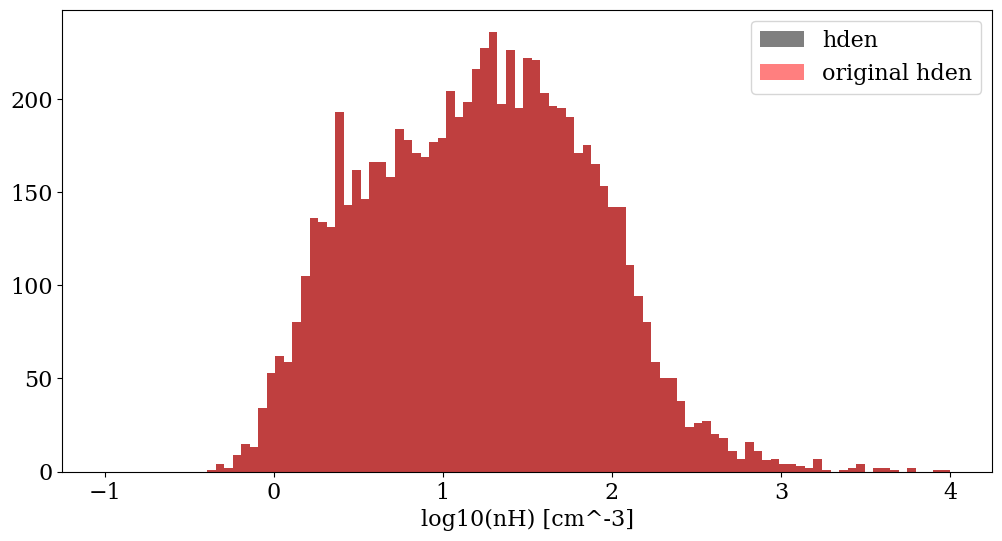

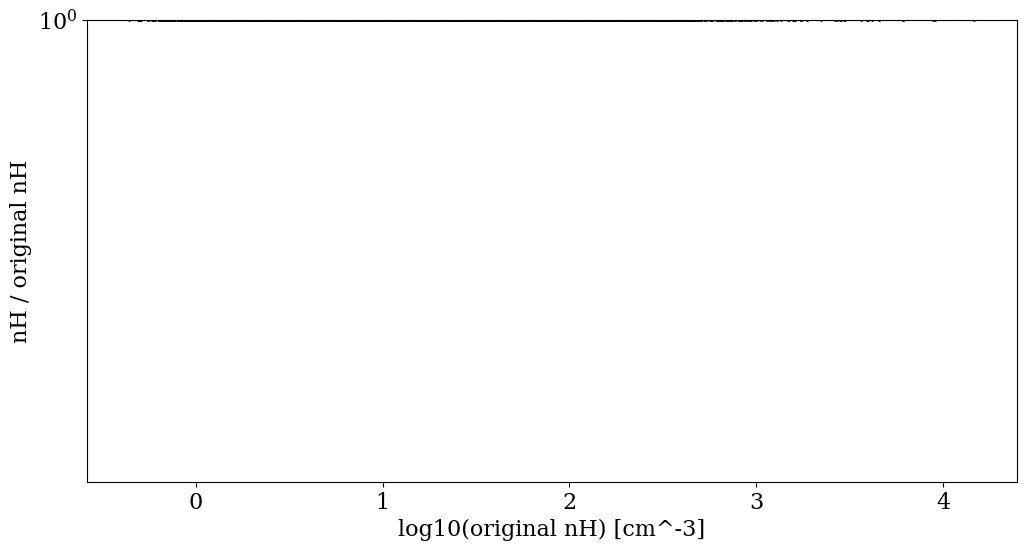

In [4]:
bins = np.linspace(-1, 4, 100)
plt.hist(
    np.log10(miville_deschenes_2017['hden']), bins = bins, alpha = 0.5, 
    label = "hden", 
    color = "black"
)
plt.hist(
    np.log10(miville_deschenes_2017['original_hden']), bins = bins, alpha = 0.5, 
    label = "original hden", 
    color = "red"   
)
plt.legend()
plt.xlabel("log10(nH) [cm^-3]")
plt.show()


ratio_hden = miville_deschenes_2017['hden'] / miville_deschenes_2017['original_hden']
plt.scatter(
    np.log10(miville_deschenes_2017['original_hden']), 
    ratio_hden,
    s = 1,
    color = "black"
)
plt.axhline(1, color = "red", ls = "--")
plt.yscale("log")
plt.xlabel("log10(original nH) [cm^-3]")
plt.ylabel("nH / original nH")
plt.show()

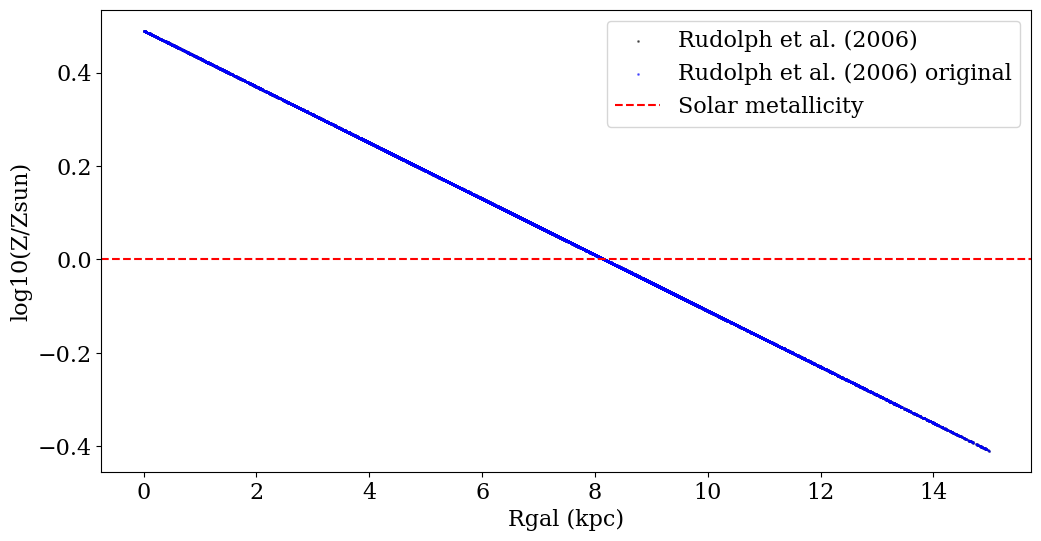

In [5]:
plt.scatter(
    miville_deschenes_2017['Rgal'], 
    np.log10(miville_deschenes_2017['metallicity']), 
    s = 1, alpha = 0.5, color = "black", label = "Rudolph et al. (2006)"
)
plt.scatter(
    miville_deschenes_2017['Rgal'], 
    np.log10(miville_deschenes_2017['rudolph_metallicity']), 
    s = 1, alpha = 0.5, color = "blue", label = "Rudolph et al. (2006) original"
)
plt.xlabel("Rgal (kpc)")
plt.ylabel("log10(Z/Zsun)")
plt.axhline(0, color = "red", ls = "--", label = "Solar metallicity")
plt.legend()

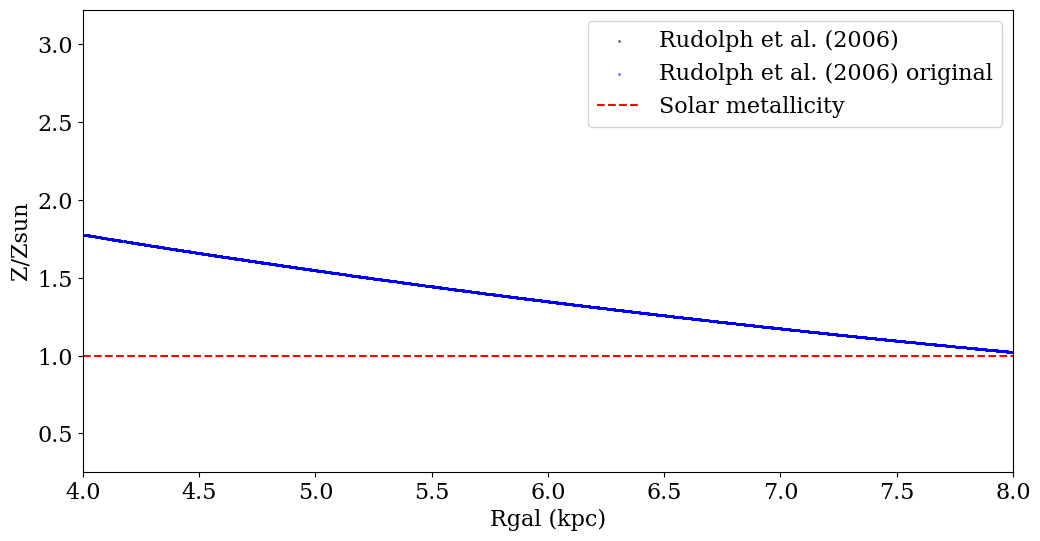

In [6]:
plt.scatter(
    miville_deschenes_2017['Rgal'], 
    miville_deschenes_2017['metallicity'], 
    s = 1, alpha = 0.5, color = "black", label = "Rudolph et al. (2006)"
)
plt.scatter(
    miville_deschenes_2017['Rgal'], 
    miville_deschenes_2017['rudolph_metallicity'], 
    s = 1, alpha = 0.5, color = "blue", label = "Rudolph et al. (2006) original"
)
plt.xlim(4,8)
# plt.ylim(-0.2, 0.6)
plt.xlabel("Rgal (kpc)")
plt.ylabel("Z/Zsun")
plt.axhline(1, color = "red", ls = "--", label = "Solar metallicity")
plt.legend()

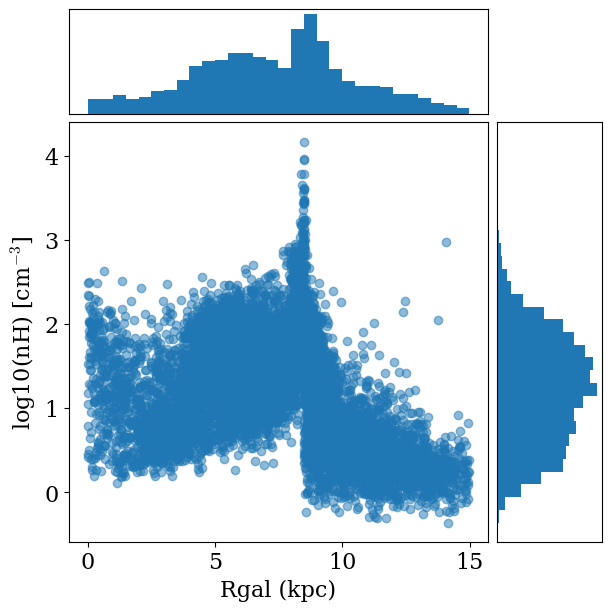

17.20717972627339
Required multiplication factor to have nH > ncrit for 50% of the clouds: 2982.7928202737266


In [7]:
fig, axs = plt.subplot_mosaic([['histx', '.'],
                               ['scatter', 'histy']],
                              figsize=(6, 6),
                              width_ratios=(4, 1), height_ratios=(1, 4),
                              layout='constrained')


# Main scatter plot
axs['scatter'].scatter(miville_deschenes_2017['Rgal'], np.log10(miville_deschenes_2017['hden']), alpha=0.5)
axs['scatter'].set_xlabel('Rgal (kpc)')
axs['scatter'].set_ylabel('log10(nH) [cm$^{-3}$]')

# Histogram on top
axs['histx'].hist(miville_deschenes_2017['Rgal'], bins=30)
axs['histx'].set_xticks([])
axs['histx'].set_yticks([])

# Histogram on the right
axs['histy'].hist(np.log10(miville_deschenes_2017['hden']), bins=30, orientation='horizontal')
axs['histy'].set_xticks([])
axs['histy'].set_yticks([])

plt.show()

# Find the median of the log(hden)
median_hden = np.median(miville_deschenes_2017['hden'])

print(median_hden)

# Critical density for CO(1-0)
ncrit = 3000 # cm^-3

# What should be the required multiplication factor to have nH > ncrit for 50% of the clouds?
required_factor = ncrit - median_hden
print("Required multiplication factor to have nH > ncrit for 50% of the clouds:", required_factor)

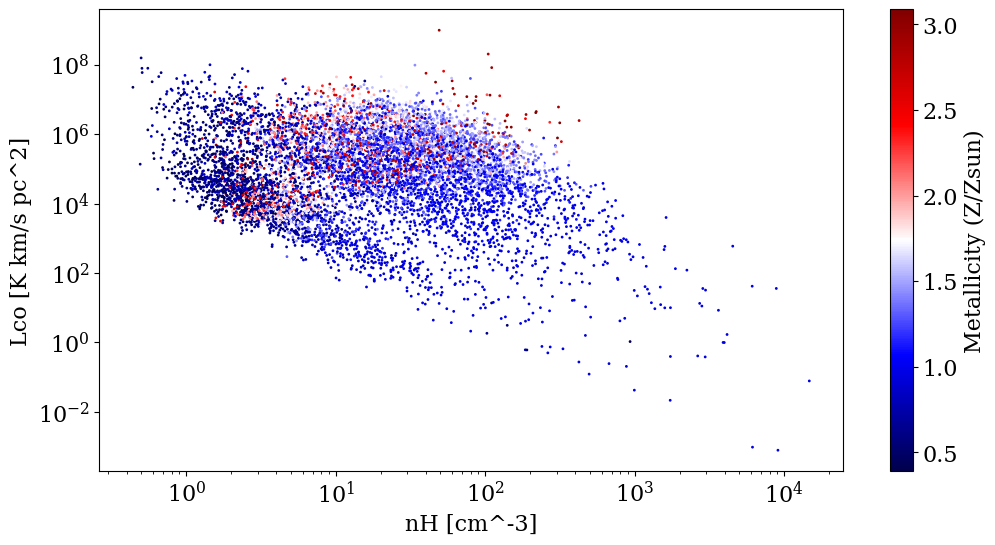

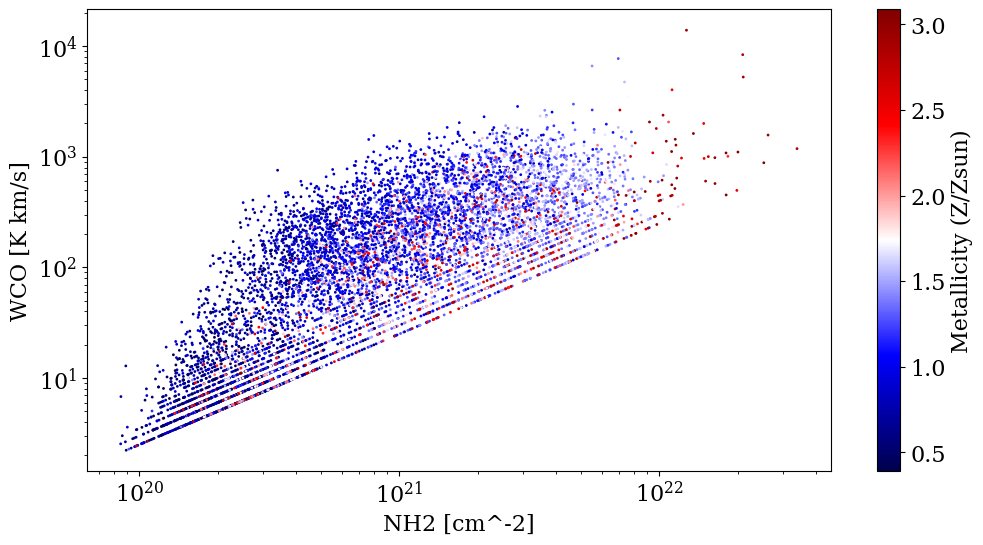

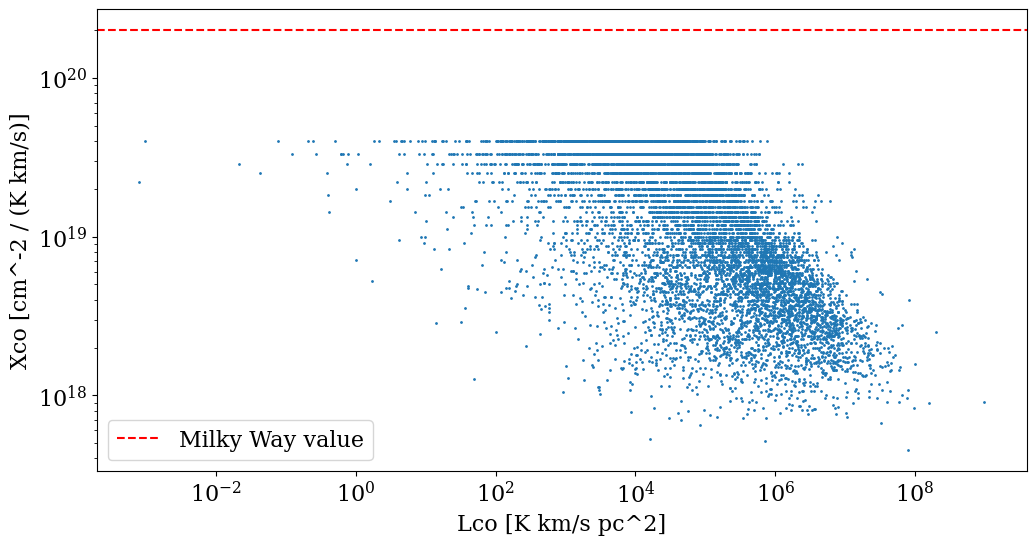

In [8]:
mappable = plt.scatter(
    miville_deschenes_2017['hden'],
    miville_deschenes_2017['Lco'],
    s = 1,
    c=miville_deschenes_2017['metallicity'],
    cmap='seismic',
)
plt.colorbar(mappable, label='Metallicity (Z/Zsun)')
plt.xscale("log")
plt.yscale("log")
plt.ylabel("Lco [K km/s pc^2]")
plt.xlabel("nH [cm^-3]")
plt.show()



mappable = plt.scatter(
    miville_deschenes_2017['NH2'],
    miville_deschenes_2017['WCO'],
    s = 1,
    c=miville_deschenes_2017['metallicity'],
    cmap='seismic',
)
plt.colorbar(mappable, label='Metallicity (Z/Zsun)')
plt.xscale("log")
plt.yscale("log")
plt.ylabel("WCO [K km/s]")
plt.xlabel("NH2 [cm^-2]")
plt.show()


# miville_deschenes_2017['Xco'] = miville_deschenes_2017['NH2'] * miville_deschenes_2017['Npix'] / miville_deschenes_2017['WCO']
miville_deschenes_2017['Xco'] = miville_deschenes_2017['NH2'] / miville_deschenes_2017['WCO']
plt.scatter(
    miville_deschenes_2017['Lco'],
    miville_deschenes_2017['Xco'],
    s = 1,
)
plt.xscale("log")
plt.yscale("log")
plt.ylabel("Xco [cm^-2 / (K km/s)]")
plt.xlabel("Lco [K km/s pc^2]")
plt.axhline(2e20, color = "red", ls = "--", label = "Milky Way value")
plt.legend()
plt.show()

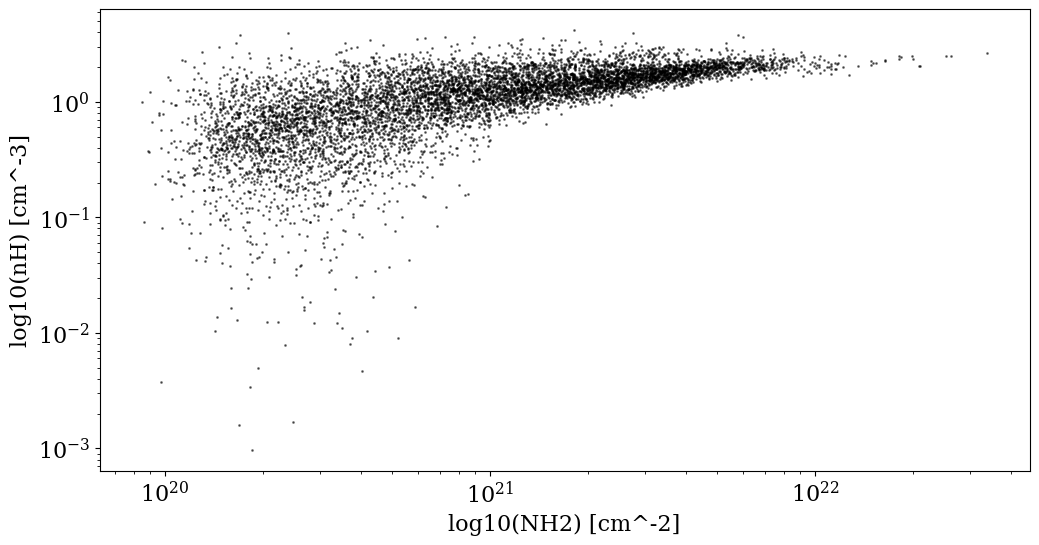

In [9]:
plt.scatter(
    miville_deschenes_2017['NH2'], 
    np.log10(miville_deschenes_2017['hden']), 
    s = 1, alpha = 0.5, color = "black"
)
plt.xlabel("log10(NH2) [cm^-2]")
plt.ylabel("log10(nH) [cm^-3]")
plt.xscale("log")
plt.yscale("log")
plt.show()

In [10]:
miville_deschenes_2017.columns

Index(['Cloud', 'Ncomp', 'Npix', 'A', 'l', 'e_l', 'b', 'e_b', 'theta', 'WCO',
       'NH2', 'Sigma', 'vcent', 'sigmav', 'Rmax', 'Rmin', 'Rang', 'Rgal',
       'INF', 'Dn', 'Df', 'zn', 'zf', 'Sn', 'Sf', 'Rn', 'Rf', 'Mn', 'Mf',
       'Lco', 'hden', 'isrf', 'radius', 'turbulence', '12 + log(O/H)',
       'metallicity', 'mass', 'original_hden', 'rudolph_metallicity', 'Xco'],
      dtype='object')

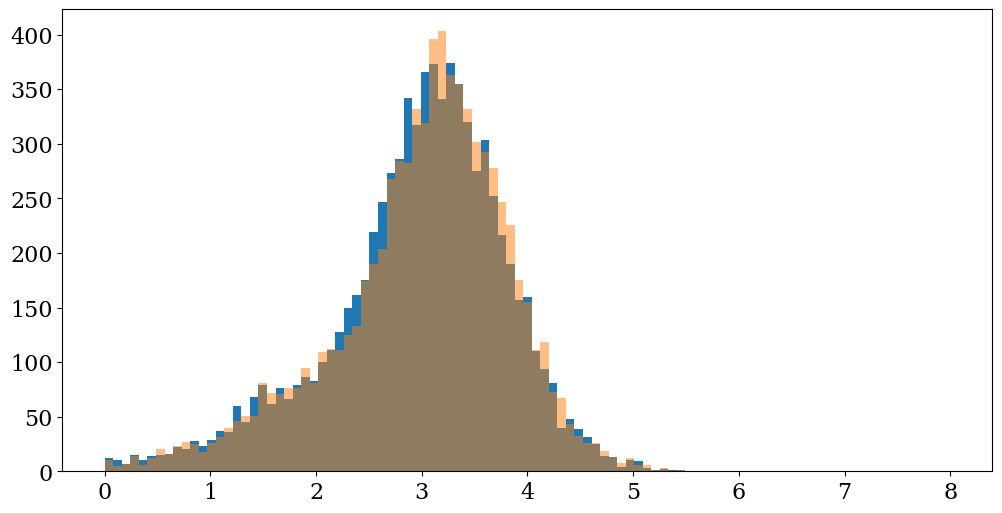

In [15]:
area = np.pi * (miville_deschenes_2017['radius'])**2  # in pc^2

area2 = miville_deschenes_2017['Sn']

bins = np.linspace(0, 8, 100)
plt.hist(
    np.log10(area),
    bins = bins, 
)
plt.hist(
    np.log10(area2),
    bins = bins,
    alpha = 0.5,
)
plt.show()

In [11]:
# # Check if the directory exists
# import os
# if not os.path.exists(base_fdir_to_write):
#     os.makedirs(base_fdir_to_write)
# else:
#     # Ask confirmation to overwrite
#     response = input(f"The directory {base_fdir_to_write} already exists. Do you want to overwrite it? (y/n): ")
#     if response.lower() != 'y':
#         print("Exiting without overwriting.")
#         exit()  


# # Get the centers 
# columns = [
#     'metallicity',
#     'hden',
#     'turbulence',
#     'isrf',
#     'radius'
# ]

# centers = miville_deschenes_2017[columns].copy()


# for i, column in enumerate(columns):
#     new_column_name = f"log_{column}"
#     centers[new_column_name] = np.log10(centers[column])
#     columns[i] = new_column_name
    
# centers = centers[columns].to_numpy()
# # Write to a file 
# fname_centers = f"{base_fdir_to_write}/centers.txt"


# header_centers = f"""Centers for cloudy runs

# The gas particles used in here belong to the molecular clouds reported in Marc-Antoine Miville-Deschênes+2017.
# https://ui.adsabs.harvard.edu/abs/2017ApJ...834...57M/abstract
# Scale length is {columns[-1]}

# Column 0: log_metallicity [log(Zsolar)]
# Column 1: log_hden [log(cm^-3)]
# Column 2: log_turbulence [log(km/s)]
# Column 3: log_isrf [log(G0)]
# Column 4: log_radius [log(pc)]
# """

# np.savetxt(fname=fname_centers, X=centers, fmt="%.8e", header=header_centers)

# print(f"File written to {fname_centers}")


# ###########################################


# # Save all data 
# data = miville_deschenes_2017.copy()
# data_fname = f"{base_fdir_to_write}/all_data.txt"
# data.to_csv(data_fname, index = False)
# print(f"File written to {data_fname}")